Import Libraries

In [105]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Functions

In [106]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# THIS IS A FUNCITON YOU CAN CALL FROM OTHER PLACES TO GET THE DATA 
def CSV_Read_Lidar_data(data_path):
    rows = []
    with open(data_path, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            rows.append(row)
    return header, rows

Read the CSV File

In [107]:
rows = []
file_path = 'Data/'
file_name = 'Hallway_Lidar_data_dinosars2'
with open(file_path+file_name+'.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

num_rows = len(rows[2::3])
headers = np.array(header).T


test


Create pd Series and DataFrames

In [108]:
# Create a Series for the header
header_names = ['angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max']
Header_info = pd.DataFrame(headers, header_names).astype(float)
Header_info

,0
angle_min,-3.124139
angle_max,3.141593
angle_increment,0.005807
time_increment,0.000113
scan_time,0.121893
range_min,0.150000
range_max,12.000000


In [109]:
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[2::3]))
rho_df = rho_df.T
rho_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2.48799991607666,3.0360000133514404,3.0360000133514404,6.74399995803833,6.800000190734863,6.688000202178955,6.728000164031982,6.728000164031982,2.240000009536743,1.7519999742507935,...,2.1080000400543213,2.1040000915527344,6.76800012588501,6.760000228881836,6.760000228881836,6.728000164031982,6.5279998779296875,6.455999851226807,6.111999988555908,6.519999980926514
1,2.5,3.0360000133514404,3.0320000648498535,6.74399995803833,6.791999816894531,6.631999969482422,6.736000061035156,6.736000061035156,2.2279999256134033,1.74399995803833,...,2.1080000400543213,2.1040000915527344,6.751999855041504,6.760000228881836,6.760000228881836,6.711999893188477,6.5279998779296875,6.455999851226807,6.111999988555908,6.51200008392334
2,2.496000051498413,3.0360000133514404,3.0360000133514404,6.74399995803833,6.791999816894531,6.639999866485596,6.728000164031982,6.736000061035156,2.2200000286102295,1.7339999675750732,...,2.1080000400543213,2.1040000915527344,6.751999855041504,6.711999893188477,6.760000228881836,6.736000061035156,6.5279998779296875,6.455999851226807,6.464000225067139,6.504000186920166
3,2.5,3.0399999618530273,3.0399999618530273,6.751999855041504,6.791999816894531,6.696000099182129,6.728000164031982,6.736000061035156,2.2079999446868896,1.722000002861023,...,2.1080000400543213,2.0999999046325684,6.76800012588501,6.703999996185303,6.760000228881836,6.760000228881836,6.480000019073486,inf,6.480000019073486,6.495999813079834
4,2.5,3.0399999618530273,3.0399999618530273,6.751999855041504,6.800000190734863,6.71999979019165,inf,6.728000164031982,2.200000047683716,1.7120000123977661,...,2.1080000400543213,2.1040000915527344,6.776000022888184,6.74399995803833,6.760000228881836,6.791999816894531,6.495999813079834,6.48799991607666,6.480000019073486,6.48799991607666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2.447999954223633,3.0360000133514404,3.0399999618530273,6.808000087738037,6.783999919891357,6.688000202178955,6.728000164031982,6.711999893188477,2.312000036239624,1.8040000200271606,...,2.1080000400543213,2.1040000915527344,6.800000190734863,6.783999919891357,6.76800012588501,inf,6.544000148773193,6.5279998779296875,6.519999980926514,6.51200008392334
1076,2.4600000381469727,3.0360000133514404,3.0399999618530273,6.791999816894531,6.815999984741211,6.679999828338623,6.728000164031982,6.71999979019165,2.2960000038146973,1.7960000038146973,...,2.1080000400543213,2.1040000915527344,6.791999816894531,6.783999919891357,6.76800012588501,6.776000022888184,6.48799991607666,6.519999980926514,6.51200008392334,6.504000186920166
1077,2.4719998836517334,3.0439999103546143,3.0439999103546143,6.800000190734863,inf,6.71999979019165,6.728000164031982,6.71999979019165,2.2880001068115234,1.781999945640564,...,2.1080000400543213,2.1040000915527344,6.776000022888184,6.783999919891357,6.76800012588501,6.776000022888184,6.480000019073486,6.5279998779296875,6.519999980926514,6.504000186920166
1078,2.4719998836517334,3.0399999618530273,3.0399999618530273,6.783999919891357,inf,6.703999996185303,6.728000164031982,6.71999979019165,2.2760000228881836,1.7699999809265137,...,2.1040000915527344,2.0999999046325684,6.760000228881836,6.776000022888184,6.760000228881836,6.776000022888184,6.48799991607666,6.5279998779296875,6.519999980926514,6.495999813079834


In [110]:
# create a dataframe of the radian alphas
alpha_df = pd.DataFrame()

for i in range(num_rows):
    # Header_info.loc['angle_increment'][i] * np.arange(1, 1081)
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081)
# alpha_df = alpha_df.transpose().drop(del_indexes, axis=1).transpose()
alpha_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,...,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807
1,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,...,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614
2,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,...,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421
3,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,...,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228
4,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,...,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,...,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311
1076,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,...,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118
1077,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,...,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925
1078,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,...,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732


In [111]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

del_indexes = np.array(list(rho_df[0][rho_df[0].astype(float) <= 0.3].index))
del_indexes


array([ 91,  92,  93,  94,  95,  96,  97, 441, 445, 446])

In [112]:
# Create the cartesasion dataset, combine with the polar, then save into a new dataset
all_data_df = []


for i in range(alpha_df.shape[1]):

    cartesian_df = pd.DataFrame(pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float)), ['X', 'Y'])
    alpha_rho_df = pd.DataFrame(cart2pol(rho_df[i].astype(float), alpha_df[i].astype(float)), ['Rho', 'Alpha'])

    #Finally combine the xy data and alpha rho data
    combined_df = pd.concat([alpha_rho_df, cartesian_df])
    combined_df = combined_df.drop(del_indexes, axis=1)
    combined_df = combined_df.T.reset_index(drop=True)
    all_data_df.append(combined_df)
all_data_df


[           Rho     Alpha         X         Y
 0     2.488007  0.002334  2.487958  0.014448
 1     2.500027  0.004646  2.499831  0.029034
 2     2.496061  0.006979  2.495621  0.043480
 3     2.500108  0.009291  2.499326  0.058065
 4     2.500169  0.011613  2.498946  0.072577
 ...        ...       ...       ...       ...
 1065  6.710744  1.197391  2.446511 -0.085356
 1066  6.720535  1.196044  2.458961 -0.071496
 1067  6.730337  1.194700  2.471331 -0.057495
 1068  6.735739  1.195017  2.471623 -0.043143
 1069  6.741141  1.195333  2.471832 -0.028790
 
 [1070 rows x 4 columns],
            Rho     Alpha         X         Y
 0     3.036006  0.001913  3.035949  0.017630
 1     3.036022  0.003825  3.035795  0.035259
 2     3.036050  0.005738  3.035539  0.052887
 3     3.040089  0.007641  3.039180  0.070607
 4     3.040139  0.009551  3.038719  0.088254
 ...        ...       ...       ...       ...
 1065  6.946847  1.118499  3.034154 -0.105858
 1066  6.952070  1.118864  3.034718 -0.088237
 1067 

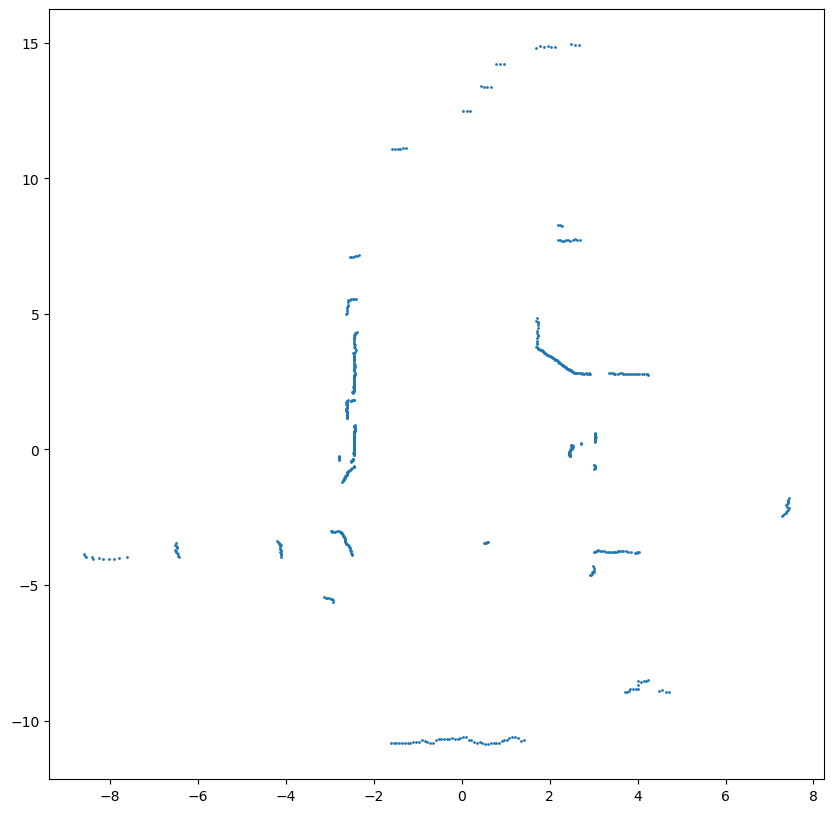

In [113]:
plt_idx = 0

plt.figure(figsize=(10, 10))
plt.scatter(all_data_df[plt_idx]['X'], all_data_df[plt_idx]['Y'], s=1)
plt.show()


In [114]:
# write to csv
addition = '_scan_data_organized'

# Save data
tmp_df = pd.DataFrame()

for i in range(len(all_data_df)):
    tmp_df = pd.concat([tmp_df, all_data_df[i]])
tmp_df = tmp_df
tmp_df.to_csv(file_path + file_name + addition + '.csv', index=False, header=True)

In [115]:
# tmp_df = pd.read_csv(file_path + file_name + addition + '.csv')

# #read and turn to list
# tmplist = []
# for i in range(int(tmp_df.shape[0]/1070)):
#     tmplist.append(tmp_df.iloc[0:1070, :])
